# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [4]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
import scipy as sp
%matplotlib inline

/Users/cour7816/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


### Step 2: Read in your data set 

In [5]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [6]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: There are 400 observations in this dataset.

#### Question 2. Create a summary table

In [7]:
#function
df_raw.describe()

/Users/cour7816/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer:  GRE has a larger standard deviation than GPA because it has a much bigger range, as shown by the `min` and `max` in the summary table, or the histograms below.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117101e10>]], dtype=object)

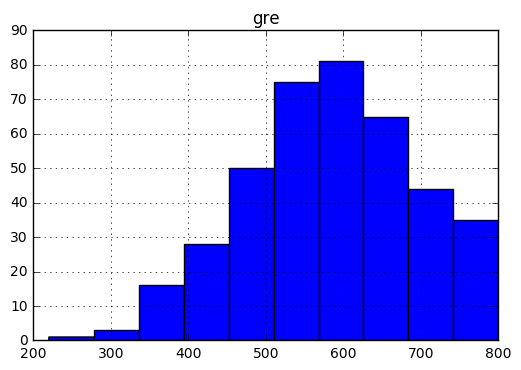

In [8]:
df_raw.hist('gre')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11975afd0>]], dtype=object)

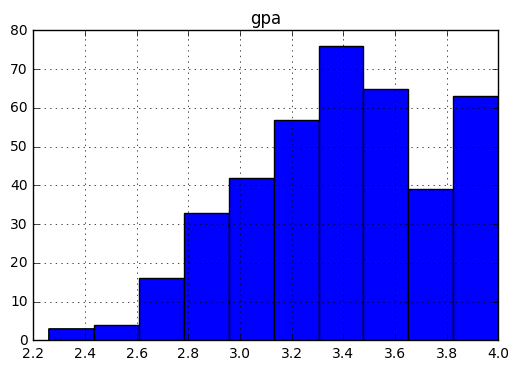

In [9]:
df_raw.hist('gpa')

#### Question 4. Drop data points with missing data


In [10]:
df = df_raw.dropna(axis=0)
df.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


#### Question 6. Create box plots for GRE and GPA

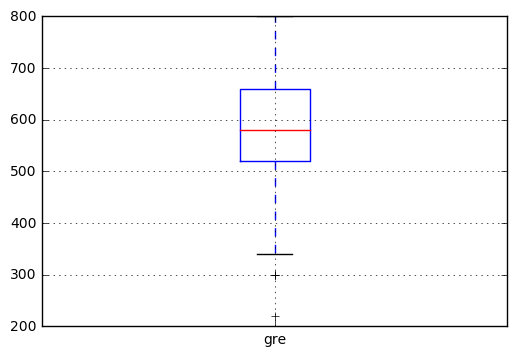

In [11]:
#boxplot for gre
df.boxplot('gre', return_type='axes')

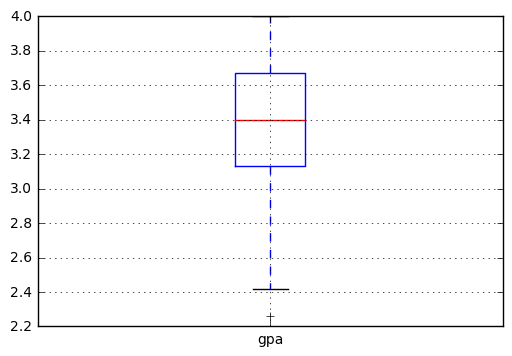

In [12]:
#boxplot for gpa
df.boxplot('gpa', return_type='axes')

#### Question 7. What do this plots show?

Answer: 
The plots show the interquartile ranges for attributes `gre` and `gpa`. `gre` shows the median sitting at 587. `gpa` shows the median sitting at 3.4. The plots show that `gre` has two outliers below the first quartile, and `gpa` has one outlier below the first quartile. 

#### Question 8. Describe each distribution 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a53c7d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11a76ddd0>]], dtype=object)

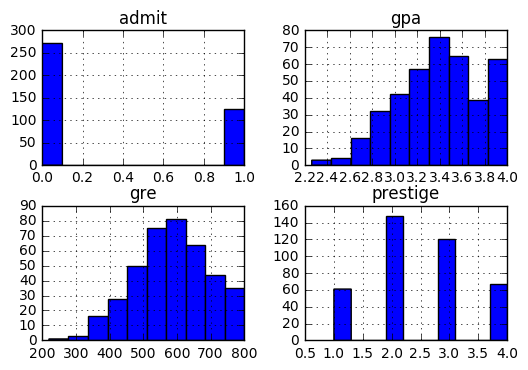

In [13]:
# plot the distribution of each variable 
df.hist()

In [14]:
sp.stats.normaltest(df, axis=0)

NormaltestResult(statistic=array([ 2203.82079872,     3.81798293,    13.07987556,    49.42125322]), pvalue=array([  0.00000000e+00,   1.48229806e-01,   1.44457838e-03,
         1.85486036e-11]))

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: No - both `gpa` and `gre` are negatively skewed. 

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: Yes, this dataset needs correction as both `gpa` and `gre` are negatively skewed. We could correct this distribution by taking the square root, natural log, or inverse of the continuous variables.

#### Question 11. Which of our variables are potentially colinear? 

In [15]:
# create a correlation matrix for the data
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


In [16]:
# create covariance matrix 
df.cov()

,admit,gre,gpa,prestige
admit,0.217197,9.772155,0.030852,-0.107505
gre,9.772155,13390.606315,16.824761,-13.648068
gpa,0.030852,16.824761,0.144558,-0.021957
prestige,-0.107505,-13.648068,-0.021957,0.896967


#### Question 12. What did you find?

Answer: No variables have perfect correlation. `gre` and `gpa` have some collinearity with a correlation of 0.38. `admit` and `prestige` also have some collinearity with a correlation of -0.24. Other variables have correlation between 0.18 and -0.12, which is very slight. 

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: Using UCLA admissions data which includes the outcome of admission and predictors of GRE scores, GPA, and undergraduate alumna prestige, we will explore the association between grad school admission rates (`admit`) and the prestige of undergraduate schools (`prestige`). 

For exploratory analysis, we will look at summary statistics for an overview of the data and to identify any missing data points. Because `admit` and `prestige` are both categorical variables, it doesn't make sense to create a histogram to determine the distribution of the data, and we can skip directly to creating a correlation matrix to determine if the variables are colinear. 

#### Question 14. What is your hypothesis? 

Answer: 
Null hypothesis: There is no association between grad school admission rates and prestige of undergraduate schools.
Alternate hypothsis: There is an association between grad school admission rates and prestige of undergradute schools.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

* Use `fillna()` to replace NA values with non-null data.
* Use `interpolate()` to perform linear interpolation at missing datapoints.

#### 2. Bonus: Log transform the skewed data

In [69]:
np.log([df.gpa, df.gre])


array([[ 1.28370777,  1.30019166,  1.38629436,  1.16002092,  1.07500242,
         1.09861229,  1.0919233 ,  1.1249296 ,  1.22082992,  1.36609165,
         1.38629436,  1.16938136,  1.38629436,  1.1249296 ,  1.38629436,
         1.23547147,  1.35325451,  0.94000726,  1.32175584,  1.33762919,
         1.15373159,  1.28923265,  1.03673688,  1.16002092,  1.20896035,
         1.29746315,  1.28370777,  1.31908561,  1.16938136,  1.19088756,
         1.32972401,  1.20896035,  1.22377543,  1.38629436,  1.1442228 ,
         1.11514159,  1.178655  ,  1.06471074,  1.141033  ,  0.98581679,
         0.88376754,  1.19996478,  1.14740245,  1.19694819,  1.07840958,
         1.23837423,  1.24126859,  1.08856195,  0.90825856,  1.20896035,
         1.35066718,  1.141033  ,  1.21491274,  1.18478998,  1.20597081,
         1.38629436,  1.16002092,  1.07840958,  1.29472717,  1.03673688,
         1.1568812 ,  1.19996478,  1.30019166,  1.34807315,  1.38629436,
         1.2781522 ,  1.28647403,  1.19392247,  1.3

#### 3. Advanced: Impute missing data

In [37]:
df_int = df_raw.interpolate()

In [38]:
df_int.describe()

,admit,gre,gpa,prestige
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,588.025000,3.391138,2.48500
std,0.466087,115.352133,0.379743,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000
